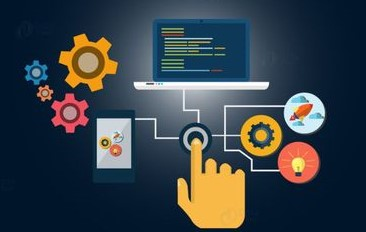



---


# <font color='LightSteelBlue'>**Pre-Processing**</font>


---



## <font color='MediumPurple'>Importing Packages </font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import joblib
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore') 

## <font color='MediumPurple'>**Our Data about changing weather in Saudi Arabia**</font>

<font color='Peru'>The Kingdom of Saudi Arabia has started the process of Cloud seeding recently
in early April 2022 , the Kingdom began the first phase of a cloud-seeding program
The goal behind this is to increase the rate of rain seeding and improve the Kingdom's climate
Note that the Kingdom is one of the driest countries in the world, and does not contain permanent of water such as rivers 
So in the next few years the weather in the kingdom will be nice and full of clouds</font>

## <font color='MediumPurple'>Loading Dataset and initial exploration first 5 rows</font>


In [ ]:
df = pd.read_csv('Weather_dataset.csv')

In [ ]:
df.shape

(1084083, 36)

In [ ]:
subdf = df.sample(n=300000) # the total number of data 2000000 and will take 300000 as number of sample

In [ ]:
subdf.shape

(300000, 36)

In [ ]:
subdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 1004585 to 437359
Data columns (total 36 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      300000 non-null  int64  
 1   STATION_ID                              300000 non-null  float64
 2   STATION_NAME                            300000 non-null  object 
 3   STATION_COUNTRY                         300000 non-null  object 
 4   OBSERVATION_DATE                        300000 non-null  object 
 5   SOURCE_ID                               300000 non-null  float64
 6   LATITUDE                                300000 non-null  float64
 7   LONGITUDE                               300000 non-null  float64
 8   ELEVATION                               300000 non-null  float64
 9   WIND_DIRECTION_ANGLE                    300000 non-null  float64
 10  WIND_DIRECTION_ANGLE_UNITS            

* <font color='LightSteelBlue'>**description the data for the  numerical coulmn**</font>

In [ ]:
subdf.describe()

,ID,STATION_ID,SOURCE_ID,LATITUDE,LONGITUDE,ELEVATION,WIND_DIRECTION_ANGLE,WIND_SPEED_RATE,SKY_CEILING_HEIGHT,VISIBILITY_DISTANCE,AIR_TEMPERATURE,AIR_TEMPERATURE_DEW_POINT,ATMOSPHERIC_SEA_LEVEL_PRESSURE
count,3.000000e+05,3.000000e+05,300000.0,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,4.633567e+06,4.061676e+10,4.0,24.655974,42.799701,619.505947,334.063270,23.126856,58365.902753,123637.294270,42.068503,34.024284,7135.258251
std,2.673130e+06,4.821788e+08,0.0,4.238258,3.971652,549.768007,312.736516,138.479372,40875.806165,315744.997307,126.286171,159.563719,4189.184985
min,3.700000e+01,4.034160e+10,4.0,16.900000,35.483333,0.000000,1.000000,0.000000,0.000000,0.000000,-42.000000,-49.000000,916.800000
25%,2.314632e+06,4.037710e+10,4.0,21.483418,39.705061,179.220000,120.000000,2.100000,22000.000000,9900.000000,19.000000,2.000000,1015.300000
50%,4.631589e+06,4.042010e+10,4.0,25.285306,42.656625,624.530000,260.000000,3.100000,22000.000000,9999.000000,26.000000,7.000000,9999.900000
75%,6.945366e+06,4.103010e+10,4.0,27.900917,46.125069,777.540000,340.000000,5.100000,99999.000000,11200.000000,32.800000,14.000000,9999.900000
max,9.270690e+06,6.923350e+10,4.0,31.692683,54.050000,2090.310000,999.000000,999.900000,99999.000000,999999.000000,999.900000,999.900000,9999.900000


* <font color='Peru'>**return a description about categrecal columns**</font>

In [ ]:
subdf.describe(exclude='number')

,STATION_NAME,STATION_COUNTRY,OBSERVATION_DATE,WIND_DIRECTION_ANGLE_UNITS,WIND_DIRECTION_QUALITY,WIND_TYPE,WIND_SPEED_RATE_UNITS,WIND_SPEED_QUALITY,SKY_CEILING_HEIGHT_UNITS,SKY_CEILING_QUALITY,...,VISIBILITY_DISTANCE_QUALITY,VISIBILITY_VARIABILITY,VISIBILITY_VARIABILITY_QUALITY,AIR_TEMPERATURE_UNITS,AIR_TEMPERATURE_QUALITY,AIR_TEMPERATURE_DEW_POINT_UNITS,AIR_TEMPERATURE_DEW_POINT_QUALITY,ATMOSPHERIC_SEA_LEVEL_PRESSURE_UNITS,ATMOSPHERIC_SEA_LEVEL_PRESSURE_QUALITY,LAST_LOAD_DATE
count,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,...,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000
unique,73,1,209749,1,3,4,1,4,1,3,...,3,3,2,1,4,1,4,1,3,1535
top,KING ABDULAZIZ AB,SA,1991-06-23 03:00:00,ANGULAR DEGREES,Passed all quality control checks,Normal,METERS PER SECOND,Passed all quality control checks,METERS,Passed all quality control checks,...,Passed all quality control checks,Not variable,Passed all quality control checks,DEGREES CELSIUS,Passed all quality control checks,DEGREES CELSIUS,Passed all quality control checks,HECTOPASCALS,Passed gross limits check if element is present,2019-05-27 17:44:23.527000
freq,17492,300000,8,300000,269566,250216,300000,294043,300000,208243,...,265507,241930,215873,300000,294545,300000,290672,300000,204414,423


In [ ]:
# Get the number of missing values per column
subdf.isna().sum()

ID                                        0
STATION_ID                                0
STATION_NAME                              0
STATION_COUNTRY                           0
OBSERVATION_DATE                          0
SOURCE_ID                                 0
LATITUDE                                  0
LONGITUDE                                 0
ELEVATION                                 0
WIND_DIRECTION_ANGLE                      0
WIND_DIRECTION_ANGLE_UNITS                0
WIND_DIRECTION_QUALITY                    0
WIND_TYPE                                 0
WIND_SPEED_RATE                           0
WIND_SPEED_RATE_UNITS                     0
WIND_SPEED_QUALITY                        0
SKY_CEILING_HEIGHT                        0
SKY_CEILING_HEIGHT_UNITS                  0
SKY_CEILING_QUALITY                       0
SKY_CEILING_DETERMINATION                 0
SKY_CAVOK                                 0
VISIBILITY_DISTANCE                       0
VISIBILITY_DISTANCE_UNITS       

In [ ]:
# Number of Unique values in each columns.
subdf.nunique()

ID                                        300000
STATION_ID                                    76
STATION_NAME                                  73
STATION_COUNTRY                                1
OBSERVATION_DATE                          209749
SOURCE_ID                                      1
LATITUDE                                      71
LONGITUDE                                     73
ELEVATION                                     71
WIND_DIRECTION_ANGLE                         129
WIND_DIRECTION_ANGLE_UNITS                     1
WIND_DIRECTION_QUALITY                         3
WIND_TYPE                                      4
WIND_SPEED_RATE                              114
WIND_SPEED_RATE_UNITS                          1
WIND_SPEED_QUALITY                             4
SKY_CEILING_HEIGHT                           133
SKY_CEILING_HEIGHT_UNITS                       1
SKY_CEILING_QUALITY                            3
SKY_CEILING_DETERMINATION                      7
SKY_CAVOK           

* <font color='LightSteelBlue'>**Exploring all the values in each column/feature**</font>

In [ ]:
for features in subdf.columns[1:]:
    print(subdf[features].value_counts())
    print("\n")

4.041610e+10    17492
4.043010e+10    12951
4.037510e+10    11539
4.037310e+10    11387
4.039410e+10    11282
                ...  
4.043850e+10        5
4.036810e+10        4
4.041810e+10        1
4.040410e+10        1
4.040210e+10        1
Name: STATION_ID, Length: 76, dtype: int64


KING ABDULAZIZ AB                17492
PRINCE MOHAMMAD BIN ABDULAZIZ    12951
TABUK                            11539
QAISUMAH                         11387
HAIL                             11282
                                 ...  
OBAYLAH                             18
TAWQAH                               4
AL-QATIF-GOSP-3                      1
GASSIM AIRPORT                       1
TABAH                                1
Name: STATION_NAME, Length: 73, dtype: int64


SA    300000
Name: STATION_COUNTRY, dtype: int64


1991-06-23 03:00:00    8
2017-08-24 12:00:00    8
2018-05-29 12:00:00    7
1994-05-09 12:00:00    7
2019-02-10 15:00:00    7
                      ..
1987-04-08 02:00:00    1
2009-12-03 

## <font color='MediumPurple'>Drop Outliers</font>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

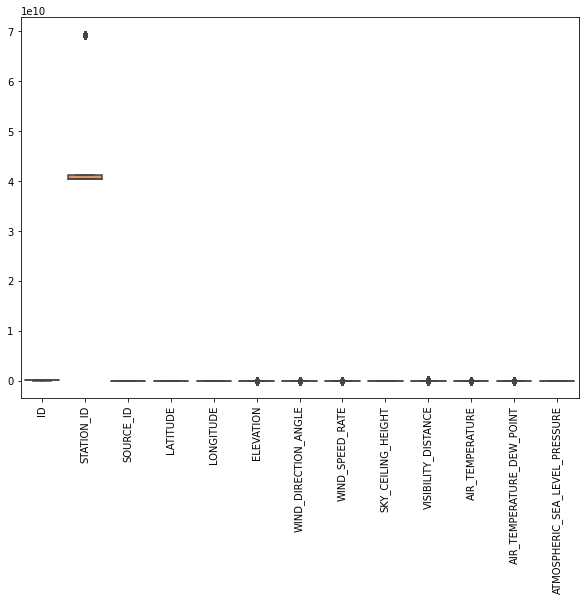

In [ ]:
# outlire in dataset
plt.figure(figsize=(10,7))
sns.boxplot(data=subdf)
plt.xticks(rotation=90)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8782fc5d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8782fc9850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8782fc5810>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8782fd1350>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8782fd1890>],
 'means': []}

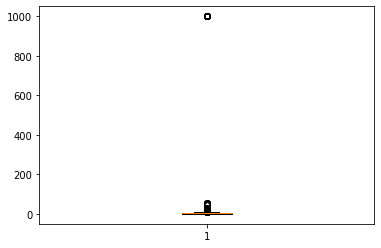

In [ ]:
plt.boxplot(subdf.WIND_SPEED_RATE)

* <font color='LightSteelBlue'>**The normal record for the wind speed are less than 10 mile per hour 
and the highst record was 200 mile per hour and that happen in 1934 
so more than that are not corrict as you can see
there is a record tells there was wind speed equal 1000 mile per houre 
so we fix it be deleting this record to have normal rang**</font>

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8782f3ae50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8782f3f910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8782f3a8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8782f46410>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8782f46950>],
 'means': []}

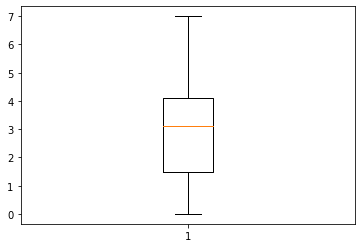

In [ ]:
subdf = subdf[subdf.WIND_SPEED_RATE <= 7]
plt.boxplot(subdf.WIND_SPEED_RATE)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8782e9ded0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8782ea1550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8782e9d950>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8782ea3510>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8782ea3a50>],
 'means': []}

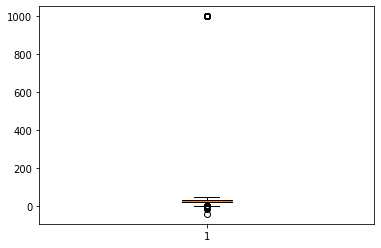

In [ ]:
plt.boxplot(subdf.AIR_TEMPERATURE)

 * <font color='Peru'>**it impossipal to have a tempreture more than 55 
so we also delet this record
    And there is some outlaire above 45 and less than 10**</font> 

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8782e82e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8782e87990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8782e82bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8782e8e490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8782e8e9d0>],
 'means': []}

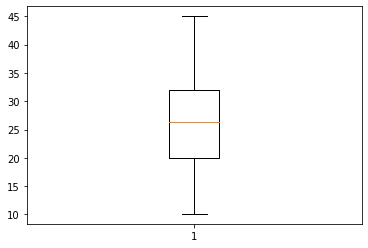

In [ ]:
# outlaier 
subdf = subdf[subdf.AIR_TEMPERATURE <= 45 ]
subdf = subdf[subdf.AIR_TEMPERATURE >10 ]
plt.boxplot(subdf.AIR_TEMPERATURE)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8782df94d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8782df9f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8782df2f10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8782e03a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8782e03f90>],
 'means': []}

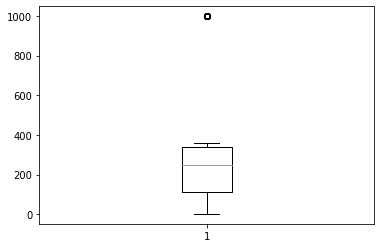

In [ ]:
plt.boxplot(subdf.WIND_DIRECTION_ANGLE)

* <font color='LightSteelBlue'>**there is 360 degree 
more than that not correct**</font>


In [ ]:
subdf = subdf[subdf.WIND_DIRECTION_ANGLE <= 360 ]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8782d6d490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8782d6df10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8782d66ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8782d73a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8782d73f50>],
 'means': []}

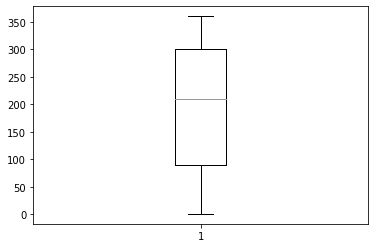

In [ ]:
plt.boxplot(subdf.WIND_DIRECTION_ANGLE)

### <font color='MediumPurple'>**Missing/duplicate Value**</font> 

* <font color='CornflowerBlue'>**Drop Missing record in cavok (Clouds And Visibility OK)**</font>

In [ ]:
subdf.groupby('SKY_CAVOK').count()

,ID,STATION_ID,STATION_NAME,STATION_COUNTRY,OBSERVATION_DATE,SOURCE_ID,LATITUDE,LONGITUDE,ELEVATION,WIND_DIRECTION_ANGLE,...,AIR_TEMPERATURE,AIR_TEMPERATURE_UNITS,AIR_TEMPERATURE_QUALITY,AIR_TEMPERATURE_DEW_POINT,AIR_TEMPERATURE_DEW_POINT_UNITS,AIR_TEMPERATURE_DEW_POINT_QUALITY,ATMOSPHERIC_SEA_LEVEL_PRESSURE,ATMOSPHERIC_SEA_LEVEL_PRESSURE_UNITS,ATMOSPHERIC_SEA_LEVEL_PRESSURE_QUALITY,LAST_LOAD_DATE
SKY_CAVOK,,,,,,,,,,,,,,,,,,,,,
Missing,227,227,227,227,227,227,227,227,227,227,...,227,227,227,227,227,227,227,227,227,227
No,119856,119856,119856,119856,119856,119856,119856,119856,119856,119856,...,119856,119856,119856,119856,119856,119856,119856,119856,119856,119856
Yes,84681,84681,84681,84681,84681,84681,84681,84681,84681,84681,...,84681,84681,84681,84681,84681,84681,84681,84681,84681,84681


In [ ]:
subdf = subdf[subdf.SKY_CAVOK != 'Missing']

In [ ]:
subdf.groupby('SKY_CAVOK').count()

,ID,STATION_ID,STATION_NAME,STATION_COUNTRY,OBSERVATION_DATE,SOURCE_ID,LATITUDE,LONGITUDE,ELEVATION,WIND_DIRECTION_ANGLE,...,AIR_TEMPERATURE,AIR_TEMPERATURE_UNITS,AIR_TEMPERATURE_QUALITY,AIR_TEMPERATURE_DEW_POINT,AIR_TEMPERATURE_DEW_POINT_UNITS,AIR_TEMPERATURE_DEW_POINT_QUALITY,ATMOSPHERIC_SEA_LEVEL_PRESSURE,ATMOSPHERIC_SEA_LEVEL_PRESSURE_UNITS,ATMOSPHERIC_SEA_LEVEL_PRESSURE_QUALITY,LAST_LOAD_DATE
SKY_CAVOK,,,,,,,,,,,,,,,,,,,,,
No,119856,119856,119856,119856,119856,119856,119856,119856,119856,119856,...,119856,119856,119856,119856,119856,119856,119856,119856,119856,119856
Yes,84681,84681,84681,84681,84681,84681,84681,84681,84681,84681,...,84681,84681,84681,84681,84681,84681,84681,84681,84681,84681


* <font color='Peru'>**Drop Variable and Missing records**</font> 

In [ ]:
subdf.groupby('WIND_TYPE').count()

,ID,STATION_ID,STATION_NAME,STATION_COUNTRY,OBSERVATION_DATE,SOURCE_ID,LATITUDE,LONGITUDE,ELEVATION,WIND_DIRECTION_ANGLE,...,AIR_TEMPERATURE,AIR_TEMPERATURE_UNITS,AIR_TEMPERATURE_QUALITY,AIR_TEMPERATURE_DEW_POINT,AIR_TEMPERATURE_DEW_POINT_UNITS,AIR_TEMPERATURE_DEW_POINT_QUALITY,ATMOSPHERIC_SEA_LEVEL_PRESSURE,ATMOSPHERIC_SEA_LEVEL_PRESSURE_UNITS,ATMOSPHERIC_SEA_LEVEL_PRESSURE_QUALITY,LAST_LOAD_DATE
WIND_TYPE,,,,,,,,,,,,,,,,,,,,,
Normal,204404,204404,204404,204404,204404,204404,204404,204404,204404,204404,...,204404,204404,204404,204404,204404,204404,204404,204404,204404,204404
Variable,133,133,133,133,133,133,133,133,133,133,...,133,133,133,133,133,133,133,133,133,133


In [ ]:
subdf = subdf[subdf.WIND_TYPE != 'Variable']

In [ ]:
subdf = subdf[subdf.WIND_TYPE != 'Missing']

In [ ]:
subdf.groupby('WIND_TYPE').count()

,ID,STATION_ID,STATION_NAME,STATION_COUNTRY,OBSERVATION_DATE,SOURCE_ID,LATITUDE,LONGITUDE,ELEVATION,WIND_DIRECTION_ANGLE,...,AIR_TEMPERATURE,AIR_TEMPERATURE_UNITS,AIR_TEMPERATURE_QUALITY,AIR_TEMPERATURE_DEW_POINT,AIR_TEMPERATURE_DEW_POINT_UNITS,AIR_TEMPERATURE_DEW_POINT_QUALITY,ATMOSPHERIC_SEA_LEVEL_PRESSURE,ATMOSPHERIC_SEA_LEVEL_PRESSURE_UNITS,ATMOSPHERIC_SEA_LEVEL_PRESSURE_QUALITY,LAST_LOAD_DATE
WIND_TYPE,,,,,,,,,,,,,,,,,,,,,
Normal,204404,204404,204404,204404,204404,204404,204404,204404,204404,204404,...,204404,204404,204404,204404,204404,204404,204404,204404,204404,204404


* <font color='Peru'>**Drop station_country column it all about Saudi Arabia (SA)**</font>

In [ ]:
subdf.groupby('STATION_COUNTRY').count()

,ID,STATION_ID,STATION_NAME,OBSERVATION_DATE,SOURCE_ID,LATITUDE,LONGITUDE,ELEVATION,WIND_DIRECTION_ANGLE,WIND_DIRECTION_ANGLE_UNITS,...,AIR_TEMPERATURE,AIR_TEMPERATURE_UNITS,AIR_TEMPERATURE_QUALITY,AIR_TEMPERATURE_DEW_POINT,AIR_TEMPERATURE_DEW_POINT_UNITS,AIR_TEMPERATURE_DEW_POINT_QUALITY,ATMOSPHERIC_SEA_LEVEL_PRESSURE,ATMOSPHERIC_SEA_LEVEL_PRESSURE_UNITS,ATMOSPHERIC_SEA_LEVEL_PRESSURE_QUALITY,LAST_LOAD_DATE
STATION_COUNTRY,,,,,,,,,,,,,,,,,,,,,
SA,204404,204404,204404,204404,204404,204404,204404,204404,204404,204404,...,204404,204404,204404,204404,204404,204404,204404,204404,204404,204404


In [ ]:
subdf = subdf.drop('STATION_COUNTRY', axis=1) # All SA

* <font color='CornflowerBlue'>**Drop visibility_variability all the record are missing**</font> 

In [ ]:
subdf.groupby('VISIBILITY_VARIABILITY').count()

,ID,STATION_ID,STATION_NAME,OBSERVATION_DATE,SOURCE_ID,LATITUDE,LONGITUDE,ELEVATION,WIND_DIRECTION_ANGLE,WIND_DIRECTION_ANGLE_UNITS,...,AIR_TEMPERATURE,AIR_TEMPERATURE_UNITS,AIR_TEMPERATURE_QUALITY,AIR_TEMPERATURE_DEW_POINT,AIR_TEMPERATURE_DEW_POINT_UNITS,AIR_TEMPERATURE_DEW_POINT_QUALITY,ATMOSPHERIC_SEA_LEVEL_PRESSURE,ATMOSPHERIC_SEA_LEVEL_PRESSURE_UNITS,ATMOSPHERIC_SEA_LEVEL_PRESSURE_QUALITY,LAST_LOAD_DATE
VISIBILITY_VARIABILITY,,,,,,,,,,,,,,,,,,,,,
Missing,42288,42288,42288,42288,42288,42288,42288,42288,42288,42288,...,42288,42288,42288,42288,42288,42288,42288,42288,42288,42288
Not variable,162116,162116,162116,162116,162116,162116,162116,162116,162116,162116,...,162116,162116,162116,162116,162116,162116,162116,162116,162116,162116


In [ ]:
subdf = subdf.drop('VISIBILITY_VARIABILITY', axis=1) # all with Missing value 

* <font color='CornflowerBlue'>**Drop unnecessary or redundant columns**</font> 

In [ ]:
subdf = subdf.drop('ID', axis=1)
subdf = subdf.drop('STATION_ID', axis=1)
subdf = subdf.drop('SOURCE_ID', axis=1)
subdf = subdf.drop('LATITUDE', axis=1)
subdf = subdf.drop('LONGITUDE', axis=1)
subdf = subdf.drop('WIND_DIRECTION_ANGLE_UNITS', axis=1)
subdf = subdf.drop('WIND_DIRECTION_QUALITY', axis=1)
subdf = subdf.drop('AIR_TEMPERATURE_DEW_POINT', axis=1)
subdf = subdf.drop('SKY_CEILING_QUALITY', axis=1)
subdf = subdf.drop('SKY_CEILING_HEIGHT_UNITS', axis=1)
subdf = subdf.drop('VISIBILITY_DISTANCE_QUALITY', axis=1)
subdf = subdf.drop('VISIBILITY_VARIABILITY_QUALITY', axis=1)
subdf = subdf.drop('AIR_TEMPERATURE_UNITS', axis=1)
subdf = subdf.drop('AIR_TEMPERATURE_QUALITY', axis=1)
subdf = subdf.drop('AIR_TEMPERATURE_DEW_POINT_UNITS', axis=1)
subdf = subdf.drop('AIR_TEMPERATURE_DEW_POINT_QUALITY', axis=1)
subdf = subdf.drop('ATMOSPHERIC_SEA_LEVEL_PRESSURE_UNITS', axis=1)
subdf = subdf.drop('ATMOSPHERIC_SEA_LEVEL_PRESSURE_QUALITY', axis=1)
subdf = subdf.drop('LAST_LOAD_DATE', axis=1)
subdf = subdf.drop('VISIBILITY_DISTANCE_UNITS', axis=1)
subdf = subdf.drop('WIND_SPEED_RATE_UNITS', axis=1)
subdf = subdf.drop('SKY_CEILING_DETERMINATION', axis=1)
subdf = subdf.drop('WIND_SPEED_QUALITY', axis=1)
subdf = subdf.drop('ATMOSPHERIC_SEA_LEVEL_PRESSURE', axis=1)

* <font color='Peru'>**Parse Float to Int**</font>

In [ ]:
subdf['ELEVATION'] = subdf['ELEVATION'].astype('int')
subdf['WIND_SPEED_RATE'] = subdf['WIND_SPEED_RATE'].astype('int')
subdf['AIR_TEMPERATURE'] = subdf['AIR_TEMPERATURE'].astype('int')


In [ ]:
# Convert date to datetime object_ for look better in visualization
subdf["OBSERVATION_DATE"] = pd.to_datetime(subdf["OBSERVATION_DATE"])

In [ ]:
subdf.head(5)

,STATION_NAME,OBSERVATION_DATE,ELEVATION,WIND_DIRECTION_ANGLE,WIND_TYPE,WIND_SPEED_RATE,SKY_CEILING_HEIGHT,SKY_CAVOK,VISIBILITY_DISTANCE,AIR_TEMPERATURE
1004585,MAKKAH,2004-01-15 13:00:00,240,300.0,Normal,2,22000.0,No,9900.0,27
1077099,KING KHALED MILITARY CITY,2009-08-22 08:00:00,412,220.0,Normal,4,99999.0,Yes,9900.0,44
1020618,NEJRAN,1993-10-23 19:00:00,1213,70.0,Normal,3,22000.0,No,11265.0,26
178416,MAKKAH,1988-02-12 07:12:00,240,220.0,Normal,2,99999.0,Yes,9900.0,28
909393,PRINCE SALMAN BIN ABDULAZIZ,2019-03-27 05:00:00,922,90.0,Normal,6,99999.0,Yes,999999.0,17


## <font color='MediumSlateBlue'>**Feature Engineering-Encoding**</font> 




* **<font color='CornflowerBlue'>In features with binary values do the transform to numbers  1 = yes else number = 0 as (SKY_CAVOK) there are two value yes, No.</font>**

* **<font color='CornflowerBlue'>For a categorical features will perform a one hot encoding.</font>**


In [ ]:
label_encoder = preprocessing.LabelEncoder()

subdf['STATION_NAME']= label_encoder.fit_transform(subdf['STATION_NAME'])
subdf['OBSERVATION_DATE']= label_encoder.fit_transform(subdf['OBSERVATION_DATE'])
subdf['WIND_TYPE']= label_encoder.fit_transform(subdf['WIND_TYPE'])
subdf['SKY_CAVOK']= label_encoder.fit_transform(subdf['SKY_CAVOK'])

In [ ]:
subdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204404 entries, 1004585 to 437359
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   STATION_NAME          204404 non-null  int64  
 1   OBSERVATION_DATE      204404 non-null  int64  
 2   ELEVATION             204404 non-null  int64  
 3   WIND_DIRECTION_ANGLE  204404 non-null  float64
 4   WIND_TYPE             204404 non-null  int64  
 5   WIND_SPEED_RATE       204404 non-null  int64  
 6   SKY_CEILING_HEIGHT    204404 non-null  float64
 7   SKY_CAVOK             204404 non-null  int64  
 8   VISIBILITY_DISTANCE   204404 non-null  float64
 9   AIR_TEMPERATURE       204404 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 17.2 MB


In [ ]:
subdf.head()

,STATION_NAME,OBSERVATION_DATE,ELEVATION,WIND_DIRECTION_ANGLE,WIND_TYPE,WIND_SPEED_RATE,SKY_CEILING_HEIGHT,SKY_CAVOK,VISIBILITY_DISTANCE,AIR_TEMPERATURE
1004585,43,90749,240,300.0,0,2,22000.0,0,9900.0,27
1077099,39,112821,412,220.0,0,4,99999.0,1,9900.0,44
1020618,46,53896,1213,70.0,0,3,22000.0,0,11265.0,26
178416,43,34943,240,220.0,0,2,99999.0,1,9900.0,28
909393,50,155607,922,90.0,0,6,99999.0,1,999999.0,17


In [ ]:
subdf.shape

(204404, 10)



---


# <font color='LightSteelBlue'>**Pre-Processing For Second Dataset**</font>


---



## <font color='MediumPurple'>**This Data about plant according the weather in Saudi Arabia**</font>

<font color='Peru'></font>

## <font color='MediumPurple'>Importing Packages </font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import joblib
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore') 

## <font color='Peru'>Loading Dataset and start exploration </font>


## load data from CSV file

In [ ]:
plantsdf = pd.read_csv('All_data_with_climate.csv') 

In [ ]:
plantsdf.head()

,Unnamed: 0,Data.ID,Location,Level,Nation.code,State.code,County.code,Crop,Qualifier,Crop.name.in.original.data,...,LGP.P.tmin5.tmax100,temp.growing.season,precip.growing.season,ndays.since.snowfrac_0.5,ndays.since.snowfrac_0.1,ndays.since.snowfrac_0.05,ndays.since.snowfrac_0,climate.category,misclassified,climate.category.string
0,1,1,Albania,N,55,NaN,NaN,Wheat,Winter,Wheat,...,252.0,8.908445,113.915234,276.0,219.0,-152.0,-160.0,1.0,True,1X
1,2,2,Albania,N,55,NaN,NaN,Maize,NaN,Maize,...,259.0,19.659421,53.091993,94.0,37.0,31.0,23.0,1.0,False,1
2,3,4,Albania,N,55,NaN,NaN,Pulses,NaN,Beans,...,253.0,20.111578,45.102474,99.0,42.0,36.0,28.0,1.0,False,1
3,4,5,Albania,N,55,NaN,NaN,Other,Winter vegetables,Winter vegetables,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
4,5,6,Albania,N,55,NaN,NaN,Other,Spring field vegetables,Spring vegetables (field planting),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN


In [ ]:
plantsdf.shape

(1510, 96)

In [ ]:
plantsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 96 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             1510 non-null   int64  
 1   Data.ID                                1510 non-null   int64  
 2   Location                               1510 non-null   object 
 3   Level                                  1510 non-null   object 
 4   Nation.code                            1510 non-null   int64  
 5   State.code                             805 non-null    float64
 6   County.code                            248 non-null    float64
 7   Crop                                   1510 non-null   object 
 8   Qualifier                              517 non-null    object 
 9   Crop.name.in.original.data             1510 non-null   object 
 10  Plant.start                            1510 non-null   int64  
 11  Plan

## <font color='LightSteelBlue'>**Plants with temp**</font> 

* <font color='LightSteelBlue'>**we need just 4 column from this dataset to reach to our goal which is predict plants according to the temperature of weather .**</font>
* <font color='LightSteelBlue'>**and we will delete other columns in the data that's unssely for goal**</font>

In [ ]:
plantsdf.drop(plantsdf.columns.difference(['Crop','Crop.name.in.original.data','temp.average','temp.min','temp.max']), 1, inplace=True)

In [ ]:
plantsdf.head()

,Crop,Crop.name.in.original.data,temp.average,temp.min,temp.max
0,Wheat,Wheat,13.298533,4.623191,22.225507
1,Maize,Maize,12.599007,3.682332,21.646772
2,Pulses,Beans,13.016876,4.271594,21.983251
3,Other,Winter vegetables,NaN,NaN,NaN
4,Other,Spring vegetables (field planting),NaN,NaN,NaN


In [ ]:
# Number of missing values in the data
plantsdf.isnull().sum()

Crop                            0
Crop.name.in.original.data      0
temp.average                  235
temp.min                      235
temp.max                      235
dtype: int64

In [ ]:
plantsdf['Crop'].dropna()

0            Wheat
1            Maize
2           Pulses
3            Other
4            Other
           ...    
1505        Cotton
1506    Groundnuts
1507     Sunflower
1508       Sorghum
1509       Sorghum
Name: Crop, Length: 1510, dtype: object

In [ ]:
plantsdf['temp.average'].fillna((plantsdf['temp.average'].mean()), inplace=True)

In [ ]:
plantsdf['temp.max'].fillna((plantsdf['temp.max'].mean()), inplace=True)

In [ ]:
plantsdf['temp.min'].fillna((plantsdf['temp.min'].mean()), inplace=True)

In [ ]:
# Number of missing values in the data
plantsdf.isnull().sum()

Crop                          0
Crop.name.in.original.data    0
temp.average                  0
temp.min                      0
temp.max                      0
dtype: int64



---


for i in plantsdf:

 if plantsdf['Crop'][i] == 'Other':

  plantsdf['Crop'][i] = plantsdf['Crop.name.in.original.data'][i]


---



plantsdf['Crop'][3] = plantsdf['Crop.name.in.original.data'][3]

---



In [ ]:
plantsdf = plantsdf.drop(['Crop'], axis=1)

In [ ]:
plantsdf['AIR_TEMPERATURE'] = plantsdf['temp.average']

In [ ]:
plantsdf['TEMP_MAX'] = plantsdf['temp.max']

In [ ]:
plantsdf['TEMP_MIN'] = plantsdf['temp.min']

In [ ]:
plantsdf = plantsdf.drop(['temp.average','temp.min','temp.max'], axis=1)

In [ ]:
plantsdf.head()

,Crop.name.in.original.data,AIR_TEMPERATURE,TEMP_MAX,TEMP_MIN
0,Wheat,13.298533,22.225507,4.623191
1,Maize,12.599007,21.646772,3.682332
2,Beans,13.016876,21.983251,4.271594
3,Winter vegetables,17.946600,25.393218,9.888232
4,Spring vegetables (field planting),17.946600,25.393218,9.888232


In [ ]:
plantsdf.rename(columns = {'Crop.name.in.original.data':'Crop'}, inplace = True)

In [ ]:
plantsdf.head()

,Crop,AIR_TEMPERATURE,TEMP_MAX,TEMP_MIN
0,Wheat,13.298533,22.225507,4.623191
1,Maize,12.599007,21.646772,3.682332
2,Beans,13.016876,21.983251,4.271594
3,Winter vegetables,17.946600,25.393218,9.888232
4,Spring vegetables (field planting),17.946600,25.393218,9.888232


## <font color='LightSteelBlue'>**Join plants with our dataset**</font> 

* <font color='LightSteelBlue'>**Now we want to Join this data of plants and temperature with the data for forecasting the weather.**</font>

In [ ]:
subdf.head()

,STATION_NAME,OBSERVATION_DATE,ELEVATION,WIND_DIRECTION_ANGLE,WIND_TYPE,WIND_SPEED_RATE,SKY_CEILING_HEIGHT,SKY_CAVOK,VISIBILITY_DISTANCE,AIR_TEMPERATURE
1004585,43,90749,240,300.0,0,2,22000.0,0,9900.0,27
1077099,39,112821,412,220.0,0,4,99999.0,1,9900.0,44
1020618,46,53896,1213,70.0,0,3,22000.0,0,11265.0,26
178416,43,34943,240,220.0,0,2,99999.0,1,9900.0,28
909393,50,155607,922,90.0,0,6,99999.0,1,999999.0,17


In [ ]:
plantsdf.head()

,Crop,AIR_TEMPERATURE,TEMP_MAX,TEMP_MIN
0,Wheat,13.298533,22.225507,4.623191
1,Maize,12.599007,21.646772,3.682332
2,Beans,13.016876,21.983251,4.271594
3,Winter vegetables,17.946600,25.393218,9.888232
4,Spring vegetables (field planting),17.946600,25.393218,9.888232


In [ ]:
plantsdf['AIR_TEMPERATURE'] = plantsdf['AIR_TEMPERATURE'].astype('int')
plantsdf['TEMP_MAX'] = plantsdf['TEMP_MAX'].astype('int')
plantsdf['TEMP_MIN'] = plantsdf['TEMP_MIN'].astype('int')


In [ ]:
dt_join =pd.merge(subdf, plantsdf, how='left'
               , left_on = 'AIR_TEMPERATURE'
               ,right_on = 'AIR_TEMPERATURE')

In [ ]:
# check out the null value
dt_join.isnull().sum()

STATION_NAME                0
OBSERVATION_DATE            0
ELEVATION                   0
WIND_DIRECTION_ANGLE        0
WIND_TYPE                   0
WIND_SPEED_RATE             0
SKY_CEILING_HEIGHT          0
SKY_CAVOK                   0
VISIBILITY_DISTANCE         0
AIR_TEMPERATURE             0
Crop                    77823
TEMP_MAX                77823
TEMP_MIN                77823
dtype: int64

In [ ]:
# spilt the data 
d = dt_join[dt_join['AIR_TEMPERATURE']>=32] #18k
r = dt_join[dt_join['AIR_TEMPERATURE']<32] # 1642815

In [ ]:
d['Crop']='Palm'
d['TEMP_MIN'] = 32
d['TEMP_MAX'] = 50

In [ ]:
df_all = pd.concat([d, r])

In [ ]:
# Number of Unique values in each columns.
df_all.nunique()

STATION_NAME                71
OBSERVATION_DATE        156375
ELEVATION                   66
WIND_DIRECTION_ANGLE        67
WIND_TYPE                    1
WIND_SPEED_RATE              8
SKY_CEILING_HEIGHT         114
SKY_CAVOK                    2
VISIBILITY_DISTANCE        117
AIR_TEMPERATURE             36
Crop                       254
TEMP_MAX                    23
TEMP_MIN                    32
dtype: int64

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8206011 entries, 82 to 8206010
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   STATION_NAME          int64  
 1   OBSERVATION_DATE      int64  
 2   ELEVATION             int64  
 3   WIND_DIRECTION_ANGLE  float64
 4   WIND_TYPE             int64  
 5   WIND_SPEED_RATE       int64  
 6   SKY_CEILING_HEIGHT    float64
 7   SKY_CAVOK             int64  
 8   VISIBILITY_DISTANCE   float64
 9   AIR_TEMPERATURE       int64  
 10  Crop                  object 
 11  TEMP_MAX              float64
 12  TEMP_MIN              float64
dtypes: float64(5), int64(7), object(1)
memory usage: 876.5+ MB


In [ ]:
# Number of Unique values in the column.
df_all['Crop'].nunique()

254

In [ ]:
df_all['Crop'] = df_all['Crop'].fillna(df_all['Crop'].mode()[0])

In [ ]:
df_all['TEMP_MIN'] = df_all['TEMP_MIN'].fillna(df_all['TEMP_MIN'].mode()[0])

In [ ]:
df_all['TEMP_MAX'] = df_all['TEMP_MAX'].fillna(df_all['TEMP_MAX'].mode()[0])

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8206011 entries, 82 to 8206010
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   STATION_NAME          int64  
 1   OBSERVATION_DATE      int64  
 2   ELEVATION             int64  
 3   WIND_DIRECTION_ANGLE  float64
 4   WIND_TYPE             int64  
 5   WIND_SPEED_RATE       int64  
 6   SKY_CEILING_HEIGHT    float64
 7   SKY_CAVOK             int64  
 8   VISIBILITY_DISTANCE   float64
 9   AIR_TEMPERATURE       int64  
 10  Crop                  object 
 11  TEMP_MAX              float64
 12  TEMP_MIN              float64
dtypes: float64(5), int64(7), object(1)
memory usage: 876.5+ MB


In [ ]:
# check out the null value
df_all.isnull().sum()

STATION_NAME            0
OBSERVATION_DATE        0
ELEVATION               0
WIND_DIRECTION_ANGLE    0
WIND_TYPE               0
WIND_SPEED_RATE         0
SKY_CEILING_HEIGHT      0
SKY_CAVOK               0
VISIBILITY_DISTANCE     0
AIR_TEMPERATURE         0
Crop                    0
TEMP_MAX                0
TEMP_MIN                0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_all['Crop_encoded'] = LabelEncoder().fit_transform(df_all['Crop'])
df_all[['Crop', 'Crop_encoded']] 

,Crop,Crop_encoded
82,Palm,127
550,Palm,127
551,Palm,127
583,Palm,127
773,Palm,127
...,...,...
8206006,Paddy - II,124
8206007,Paddy - II,124
8206008,Paddy - II,124
8206009,Cotton,46


In [ ]:
encoder = LabelEncoder()
encoder.fit(df_all['Crop'])
encoder.classes_

array(['All Cereals (Belg)', 'Aman paddy/Kharif', 'Aman rice', 'Anise',
       'Aus rice', 'Bajra', 'Bajra (Kharif)', 'Bananas', 'Barley',
       'Barley (Meher)', 'Barley (long rains)', 'Barley (short rains)',
       'Barley (winter)', 'Barley - spring', 'Barley - winter', 'Bean',
       'Beans', 'Beans (Deyr)', 'Beans (Gu)', 'Beans (long rains)',
       'Beans (main)', 'Beans (second)', 'Beans (short rains)',
       'Beans (third)', 'Beans - dry', 'Birdseed', 'Boro paddy/Rabi',
       'Boro rice', 'Broom Millet', 'Buckwheat', 'Canola', 'Cassava',
       'Castor (Kharif)', 'Castor beans', 'Castorseed', 'Cereals',
       'Chickpeas', 'Cholam', 'Corn', 'Corn (1)', 'Corn (2)',
       'Corn (north - vuli rains)', 'Corn, Dry season',
       'Corn, first crop', 'Corn, rainy season', 'Corn, second crop',
       'Cotton', 'Cotton (Deyr)', 'Cotton (Gu)', 'Cotton (Hybrid)',
       'Cotton (Hybrid, irrigated)', 'Cotton (Kharif)', 'Cotton (coast)',
       'Cotton (east)', 'Cotton (lake)', 'Cotton

In [ ]:
df_all['Crop_encoded'] = encoder.transform(df_all['Crop']) # transform as a separate step from fit
df_all[['Crop', 'Crop_encoded']]

,Crop,Crop_encoded
82,Palm,127
550,Palm,127
551,Palm,127
583,Palm,127
773,Palm,127
...,...,...
8206006,Paddy - II,124
8206007,Paddy - II,124
8206008,Paddy - II,124
8206009,Cotton,46


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8206011 entries, 82 to 8206010
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   STATION_NAME          int64  
 1   OBSERVATION_DATE      int64  
 2   ELEVATION             int64  
 3   WIND_DIRECTION_ANGLE  float64
 4   WIND_TYPE             int64  
 5   WIND_SPEED_RATE       int64  
 6   SKY_CEILING_HEIGHT    float64
 7   SKY_CAVOK             int64  
 8   VISIBILITY_DISTANCE   float64
 9   AIR_TEMPERATURE       int64  
 10  Crop                  object 
 11  TEMP_MAX              float64
 12  TEMP_MIN              float64
 13  Crop_encoded          int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 939.1+ MB


In [ ]:
df_all.head()

,STATION_NAME,OBSERVATION_DATE,ELEVATION,WIND_DIRECTION_ANGLE,WIND_TYPE,WIND_SPEED_RATE,SKY_CEILING_HEIGHT,SKY_CAVOK,VISIBILITY_DISTANCE,AIR_TEMPERATURE,Crop,TEMP_MAX,TEMP_MIN,Crop_encoded
82,39,112821,412,220.0,0,4,99999.0,1,9900.0,44,Palm,50.0,32.0,127
550,1,132828,179,110.0,0,3,22000.0,0,6000.0,40,Palm,50.0,32.0,127
551,43,100413,240,360.0,0,2,99999.0,1,9900.0,38,Palm,50.0,32.0,127
583,69,56039,7,250.0,0,4,99999.0,1,9900.0,34,Palm,50.0,32.0,127
773,16,23737,1184,10.0,0,1,22000.0,0,12000.0,35,Palm,50.0,32.0,127


In [ ]:
df_all = df_all.drop(['Crop'], axis=1)

In [ ]:
df_all.head(2)

,STATION_NAME,OBSERVATION_DATE,ELEVATION,WIND_DIRECTION_ANGLE,WIND_TYPE,WIND_SPEED_RATE,SKY_CEILING_HEIGHT,SKY_CAVOK,VISIBILITY_DISTANCE,AIR_TEMPERATURE,TEMP_MAX,TEMP_MIN,Crop_encoded
82,39,112821,412,220.0,0,4,99999.0,1,9900.0,44,50.0,32.0,127
550,1,132828,179,110.0,0,3,22000.0,0,6000.0,40,50.0,32.0,127


In [ ]:
df_all.rename(columns = {'Crop_encoded':'Crop'}, inplace = True)

In [ ]:
df_all.head(2)

,STATION_NAME,OBSERVATION_DATE,ELEVATION,WIND_DIRECTION_ANGLE,WIND_TYPE,WIND_SPEED_RATE,SKY_CEILING_HEIGHT,SKY_CAVOK,VISIBILITY_DISTANCE,AIR_TEMPERATURE,TEMP_MAX,TEMP_MIN,Crop
82,39,112821,412,220.0,0,4,99999.0,1,9900.0,44,50.0,32.0,127
550,1,132828,179,110.0,0,3,22000.0,0,6000.0,40,50.0,32.0,127


* <font color='Peru'>**Export the final dataset after ding preprocessin and encoding of the join to reuseit in ML Model**</font>

In [ ]:
df_all.to_csv('df_all.csv', index=False)

# <font color='48B3C1'>**Machine Learning Model**</font>





## <font color='B048C1'>**Model 1: Regression**</font>

<font color='black'>**Predict the suitable air temperature for the specific  plants**</font>



* <font color='B048C1'>**import package**</font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore') 

* <font color='B048C1'>**select the input features and target feature**</font>

In [ ]:
X=df_all[['STATION_NAME','ELEVATION','WIND_SPEED_RATE','SKY_CAVOK','Crop','TEMP_MIN',	'TEMP_MAX']]
Y=df_all['AIR_TEMPERATURE']

* <font color='B048C1'>**split the data**</font>

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

* <font color='B048C1'>**make a scaler to the data before train in the model**</font>

In [ ]:
sc = StandardScaler()


X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

* <font color='B048C1'>**Trian the data to the Linear Regression Model**</font>

In [ ]:
regressorModel1 = LinearRegression()
regressorModel1.fit(X_train, Y_train)

LinearRegression()

* <font color='B048C1'>**Model Evaluation**</font>

In [ ]:
# Calculates the cost functions
def calc_cost(y_true, y_predict):
    
    "Calculate Cost Functions and print output"
    
    result_dict = {}
    
    mse = mean_squared_error(y_true, y_predict)
    mae = mean_absolute_error(y_true, y_predict)
    rmse = mean_squared_error(y_true, y_predict, squared=False)
    
    
    ls = [mse, mae, rmse]
    ls2 = ["MSE", "MAE", "RMSE"]
    
    for x in range(len(ls)):
        print(f"{ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
    
    return result_dict


print("Linear Regression")



print("\nIn training ")
resTrain = calc_cost(Y_train,  regressorModel1.predict(X_train))

print("\nIn testing")
resVal = calc_cost(Y_test,  regressorModel1.predict(X_test))

Linear Regression

In training 
MSE: 0.9040759923573214
MAE: 0.5446406341453638
RMSE: 0.9508291078618288

In testing
MSE: 0.9023857474658576
MAE: 0.5449482453857899
RMSE: 0.9499398651840324


In [ ]:
print("R2: ")
r2_score(y_true=Y_test, y_pred= regressorModel1.predict(X_test))

R2: 


0.9621653722200272

## <font color='4884C1'>**Model 2: Classification**</font>

<font color='black'>**Predict the suitable season for each plant**</font>


* <font color='4884C1'>**Convert the target values into category by bins the data**</font>

In [ ]:
df_all.loc[df_all['AIR_TEMPERATURE'].between(1, 20), 'Plant_Sesone'] = 'Winter'
df_all.loc[df_all['AIR_TEMPERATURE'].between(21, 25), 'Plant_Sesone'] = 'Spring'
df_all.loc[df_all['AIR_TEMPERATURE'].between(25, 35), 'Plant_Sesone'] = 'autumn'
df_all.loc[df_all['AIR_TEMPERATURE'].between(36, 50), 'Plant_Sesone'] = 'Summer'

* <font color='4884C1'>**Select the input features and target feature**</font>

In [ ]:
X1=df_all[['STATION_NAME','ELEVATION','WIND_SPEED_RATE','SKY_CAVOK','Crop','TEMP_MIN',	'TEMP_MAX']]
Y1=df_all['Plant_Sesone']

* <font color='4884C1'>**Split the data**</font>

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size = 0.25, random_state = 0)

* <font color='4884C1'>**make a scaler to the data before train in the model**</font>

In [ ]:
# Feature Engeenring 
sc = StandardScaler()


X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

* <font color='4884C1'>**Trian the data to the Logistic Regression Model**</font>

In [ ]:
classifierModel=LogisticRegression()
classifierModel.fit(X_train, Y_train)

LogisticRegression()

* <font color='4884C1'>**Model Evaluation**</font>

In [ ]:
classifierModel.score(X_train, Y_train)

0.9532477657027987

In [ ]:
#Predict the model 
Model1Pred = classifierModel.predict(X_test)
print(classification_report(Y_test, Model1Pred))

              precision    recall  f1-score   support

      Spring       0.93      0.86      0.89    410661
      Summer       0.56      0.70      0.62      7872
      Winter       0.98      0.99      0.98    901996
      autumn       0.94      0.96      0.95    730974

    accuracy                           0.95   2051503
   macro avg       0.85      0.88      0.86   2051503
weighted avg       0.95      0.95      0.95   2051503



Text(0.5, 1.0, 'Logistic Regression Results')

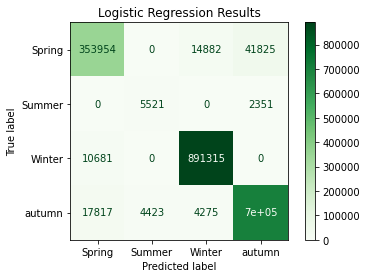

In [ ]:
Model1Matrix = plot_confusion_matrix(classifierModel, X_test, Y_test, cmap='Greens')
Model1Matrix.ax_.set_title('Logistic Regression Results')